# **Business Case : Yulu - Hypothesis Testing**

## **Yulu:**
Yulu is a pioneering micro-mobility service provider that offers sustainable transportation solutions through shared electric cycles. With a mission to revolutionize daily commutes and promote eco-friendly urban mobility, Yulu aims to provide convenient and affordable transportation options to users across various cities.

##**Problem Statement:**
Yulu has encountered revenue setbacks and challenges in understanding the demand factors for their shared electric cycles, particularly in the Indian market. The company seeks to identify the key variables influencing bike rental demand and optimize its operations and marketing strategies accordingly.

## **Objective:**
The objective of this case study is to analyze the factors affecting the demand for shared electric cycles in the Indian market and provide data-driven insights to Yulu. By understanding the relationship between different variables such as weather conditions, seasons, and user behavior, the goal is to enable Yulu to make informed decisions to enhance its services and revenue generation.

##**Business Goal:**
The primary business goal of this case study is to help Yulu regain profitability and drive sustainable growth in the Indian micro-mobility market. By identifying and leveraging the factors that impact bike rental demand, Yulu aims to optimize its fleet management, pricing strategies, and marketing initiatives to meet the evolving needs of users and maximize revenue opportunities. Ultimately, the goal is to establish Yulu as a leading provider of shared electric cycles, contributing to sustainable urban transportation and environmental conservation efforts.

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, ttest_1samp, ttest_ind, ttest_rel, chisquare, chi2_contingency, shapiro, kurtosis, levene, skew, f_oneway, chi2_contingency
from statsmodels.graphics.gofplots import qqplot
from scipy import stats
import statsmodels.stats.weightstats as sm

In [2]:
#Downloading Dataset
!gdown 13yftIfUUhiOdByyIs0LDfI6qrhCwpK0_

Downloading...
From: https://drive.google.com/uc?id=13yftIfUUhiOdByyIs0LDfI6qrhCwpK0_
To: /content/yulu.csv
100% 648k/648k [00:00<00:00, 142MB/s]


In [3]:
#Assigning dataset to a variable
df = pd.read_csv("/content/yulu.csv", parse_dates = [0], dayfirst = True)

In [14]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## Basic Exploratory Data Analysis

In [15]:
print("Count of rows : {}".format(df.shape[0]))
print("Count of columns : {}".format(df.shape[1]))

Count of rows : 10886
Count of columns : 12


In [16]:
#columns datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [17]:
# Null Values
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

No null values in the dataset.

In [9]:
#Duplicate rows
len(df[df.duplicated()])

0

No duplicate values in the dataset.

##Converting column's datatype


In [10]:
df["season"] = df["season"].astype("category")

df["weather"] = df["weather"].astype("category")

df["holiday"] = df["holiday"].astype("category")

df["workingday"] = df["workingday"].astype("category")

We would require Season, Weather, Holiday and Workingday for our analysis. So, it would be great if we convert them in categorical data type.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


In [16]:
#statistical analysis of dataset
df.describe(include = ['int64', 'float64'])

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


- **temp** : Minimum temp is 0.82 and maximum is 41. Mean temp value is 20.23 and median value is 20.50. For 75% of the data, temp value is 26.24. No outliers.
- **atemp** : Minimum atemp is 0.76 and maximum is 45.45. Mean atemp value is 23.65 and median value is 24.24. For 75% of the data, atemp value is 31.06. Almost No outliers.
- **humidity** : Minimum value is 0 and maximum is 100. Mean value is 61.88 and median value is 62. For 75% of the data, value is 77. Very less outliers.
- **windspeed** : Minimum value is 0 and maximum is 56.99. Mean value is 12.79 and median value is 12.99. For 75% of the data, value is 16.99. No outliers.
- **casual** : Minimum value is 0 and maximum is 367. Mean value is 36.02 and median value is 17. For 75% of the data, value is 49. More outliers.
- **registeres** : Minimum value is 0 and maximum is 886. Mean value is 155.55 and median value is 118. For 75% of the data, value is 222. More outliers.
- **count** : Minimum value is 1 and maximum is 977. Mean value is 191.57 and median value is 145. For 75% of the data, value is 284. More outliers

In [17]:
df.describe(include = ['object', 'category'])

,season,holiday,workingday,weather
count,10886,10886,10886,10886
unique,4,2,2,4
top,4,0,1,1
freq,2734,10575,7412,7192


- **season** : Total 4 unique seasons (1: spring, 2: summer, 3: fall, 4: winter). Season 4 is topping the list with total count 2734.
- **holiday** : In this we have two values. '0' mean it's not a holiday and 1 means it's a holiday. Out of 10886 rows, 10757 are not holidays.
- **workingday** : In this we have two values. '0' mean it's not a working day and 1 means it's a working day. Out of 10886 rows, 7412 are working days.
- **weather** : Total 4 unique weathers (1: Clear, Few clouds, partly cloudy, 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist, 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain +
Scattered clouds, 4: Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog spring, 2: summer, 3: fall, 4: winter). Season 1 is topping the list with total count 7192.

## Detecting outliers

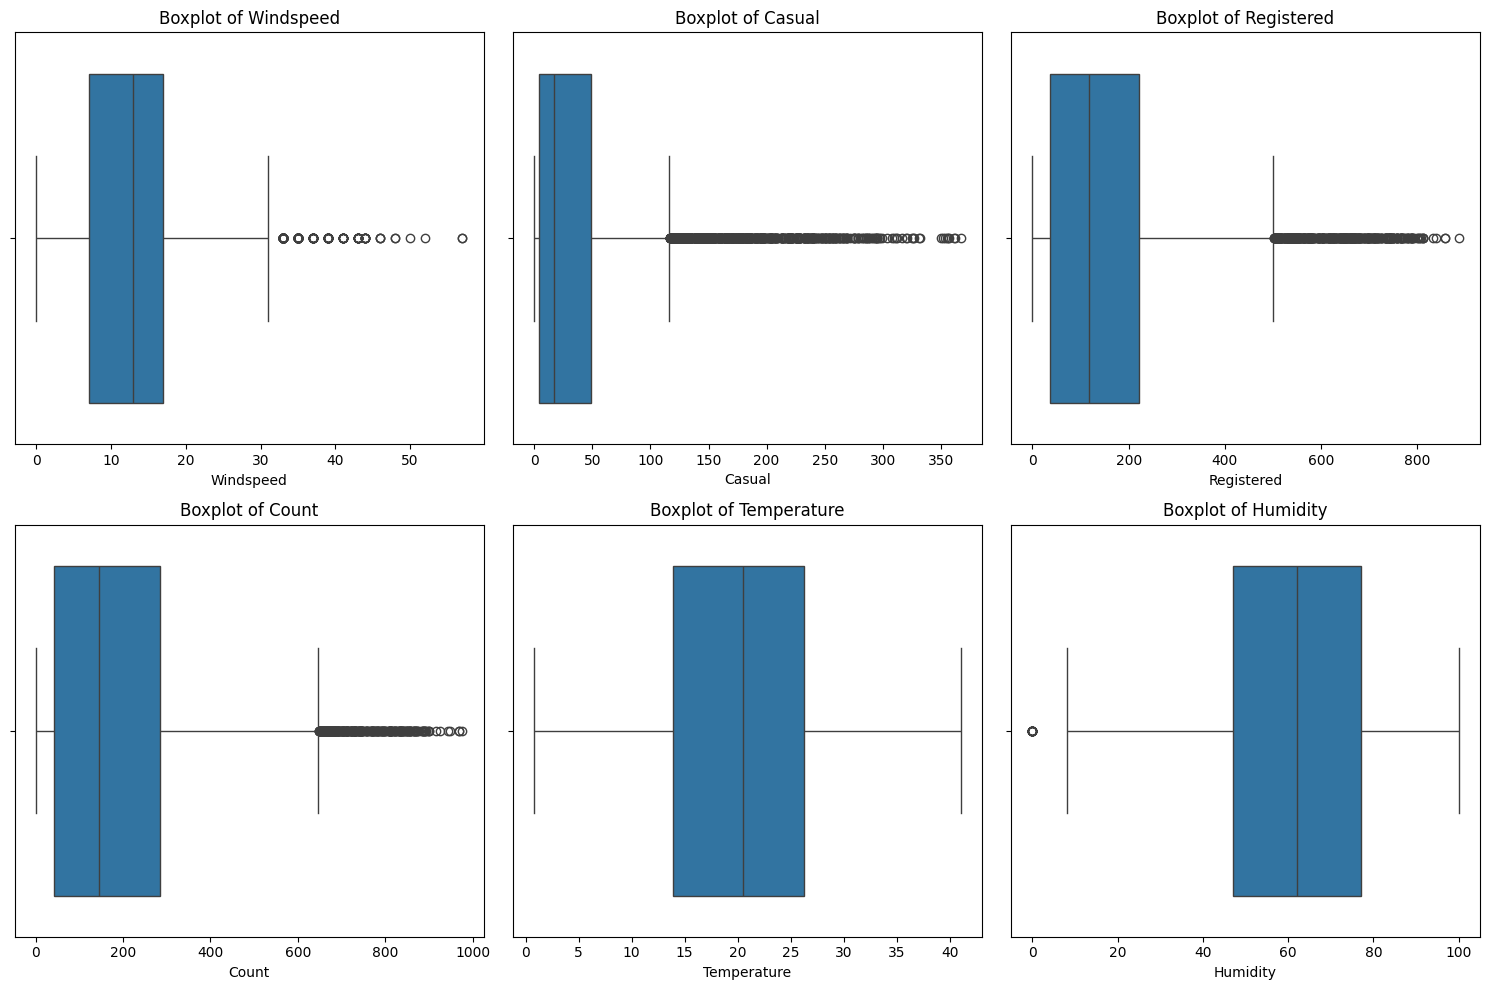

In [20]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.boxplot(x=df["windspeed"])
plt.title("Boxplot of Windspeed")
plt.xlabel("Windspeed")

plt.subplot(2, 3, 2)
sns.boxplot(x=df["casual"])
plt.title("Boxplot of Casual")
plt.xlabel("Casual")

plt.subplot(2, 3, 3)
sns.boxplot(x=df["registered"])
plt.title("Boxplot of Registered")
plt.xlabel("Registered")

plt.subplot(2, 3, 4)
sns.boxplot(x=df["count"])
plt.title("Boxplot of Count")
plt.xlabel("Count")

plt.subplot(2, 3, 5)
sns.boxplot(x=df["temp"])
plt.title("Boxplot of Temperature")
plt.xlabel("Temperature")

plt.subplot(2, 3, 6)
sns.boxplot(x=df["humidity"])
plt.title("Boxplot of Humidity")
plt.xlabel("Humidity")

plt.tight_layout()
plt.show()

Above visualization shows that we have outliers in Windspeed, Casual, Registered, Count variables. One outlier in Humidity variable and no outlier in Temperature.

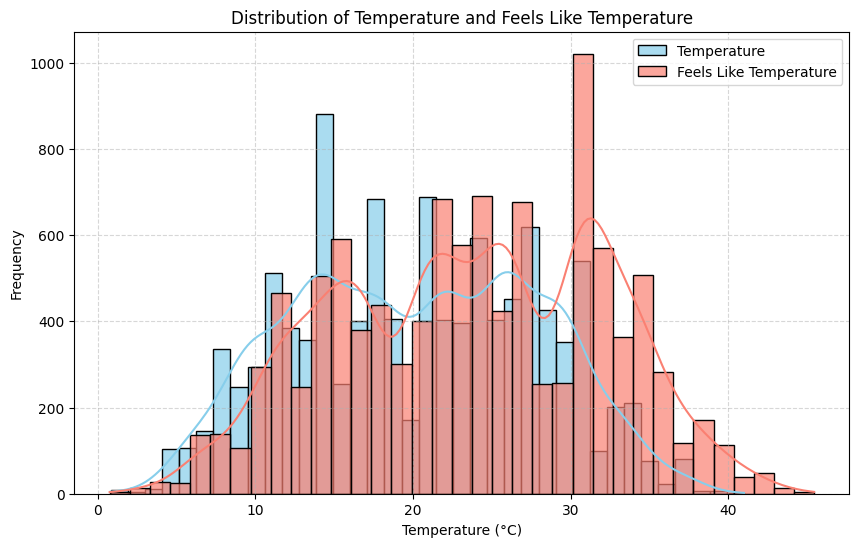

In [21]:
#comparison between temp & atemp feature

plt.figure(figsize=(10, 6))

sns.histplot(df["temp"], kde=True, color='skyblue', label='Temperature', alpha=0.7)
sns.histplot(df["atemp"], kde=True, color='salmon', label='Feels Like Temperature', alpha=0.7)

plt.title("Distribution of Temperature and Feels Like Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.legend()

plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

As per above analysis we can conclude that there temp and atemp are almost same variables. So we can drop atemp variable as we don't need this variable in our analysis.

In [22]:
#dropping atemp column
df = df.drop("atemp", axis = 1)

# Univariate Analysis

## Plotting continuous variables

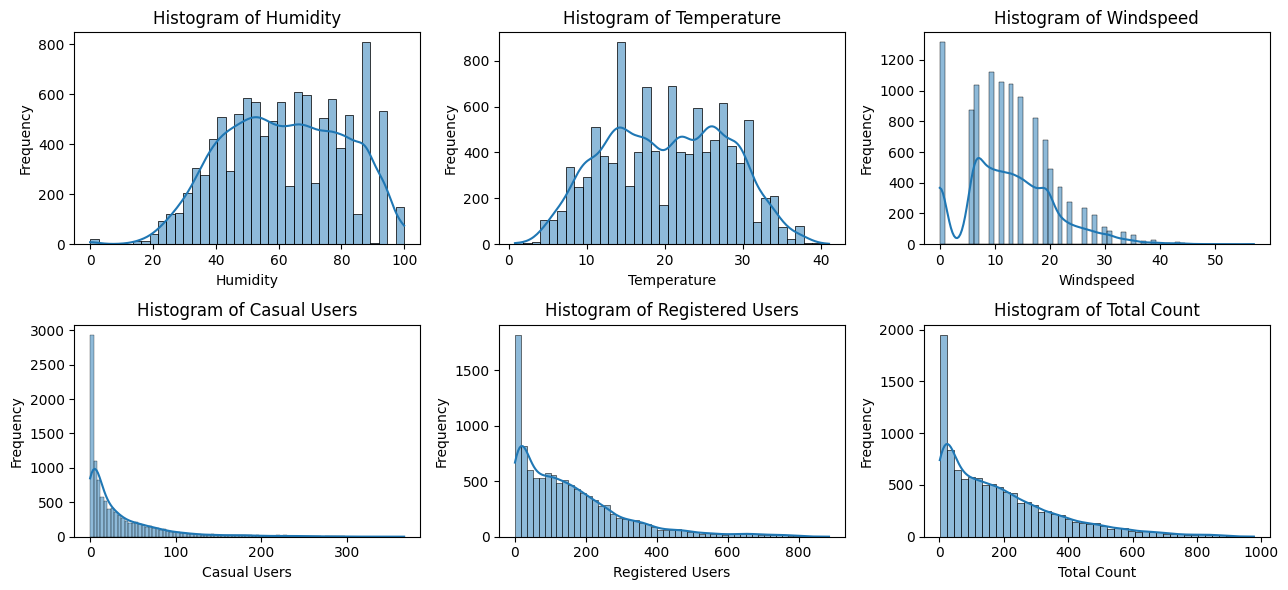

In [23]:
plt.figure(figsize=(13, 6))

plt.subplot(2, 3, 1)
sns.histplot(df["humidity"], kde=True)
plt.title("Histogram of Humidity")
plt.xlabel("Humidity")
plt.ylabel("Frequency")

plt.subplot(2, 3, 2)
sns.histplot(df["temp"], kde=True)
plt.title("Histogram of Temperature")
plt.xlabel("Temperature")
plt.ylabel("Frequency")

plt.subplot(2, 3, 3)
sns.histplot(df["windspeed"], kde=True)
plt.title("Histogram of Windspeed")
plt.xlabel("Windspeed")
plt.ylabel("Frequency")

plt.subplot(2, 3, 4)
sns.histplot(df["casual"], kde=True)
plt.title("Histogram of Casual Users")
plt.xlabel("Casual Users")
plt.ylabel("Frequency")

plt.subplot(2, 3, 5)
sns.histplot(df["registered"], kde=True)
plt.title("Histogram of Registered Users")
plt.xlabel("Registered Users")
plt.ylabel("Frequency")

plt.subplot(2, 3, 6)
sns.histplot(df["count"], kde=True)
plt.title("Histogram of Total Count")
plt.xlabel("Total Count")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

- **Histogram** is little bit left skewed.
- **Temperature** is almost normally distributed.
- **Windspeed** is right skewed.
- **Casual Users** is right skewed.
- **Registered Users** is right skewed.
- **Total Count** is right skewed.

##Plotting categorical variables

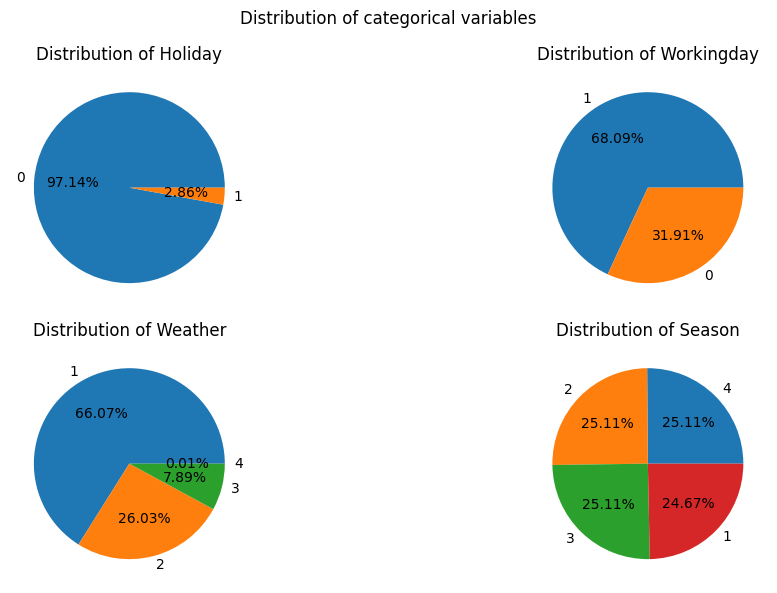

In [27]:
plt.figure(figsize = (13,6))

plt.subplot(2,2,1)
plt.pie(df["holiday"].value_counts(), autopct = '%.2f%%', labels = df["holiday"].value_counts().index )
plt.title("Distribution of Holiday")

plt.subplot(2,2,2)
plt.pie(df["workingday"].value_counts(), autopct = '%.2f%%', labels = df["workingday"].value_counts().index )
plt.title("Distribution of Workingday")

plt.subplot(2,2,3)
plt.pie(df["weather"].value_counts(), autopct = '%.2f%%', labels = df["weather"].value_counts().index )
plt.title("Distribution of Weather")

plt.subplot(2,2,4)
plt.pie(df["season"].value_counts(), autopct = '%.2f%%', labels = df["season"].value_counts().index )
plt.title("Distribution of Season")

plt.suptitle("Distribution of categorical variables")

plt.tight_layout()

# Bivariate Analysis

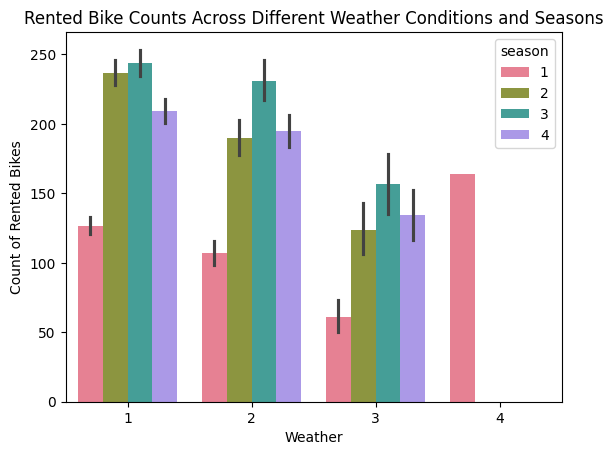

In [12]:
palette = sns.color_palette("husl", 4)

sns.barplot(x=df["weather"], hue=df["season"], y=df["count"], palette=palette)

plt.xlabel("Weather")
plt.ylabel("Count of Rented Bikes")
plt.title("Rented Bike Counts Across Different Weather Conditions and Seasons")

plt.show()


## Workday and Count, Season and Count, Weather and Count

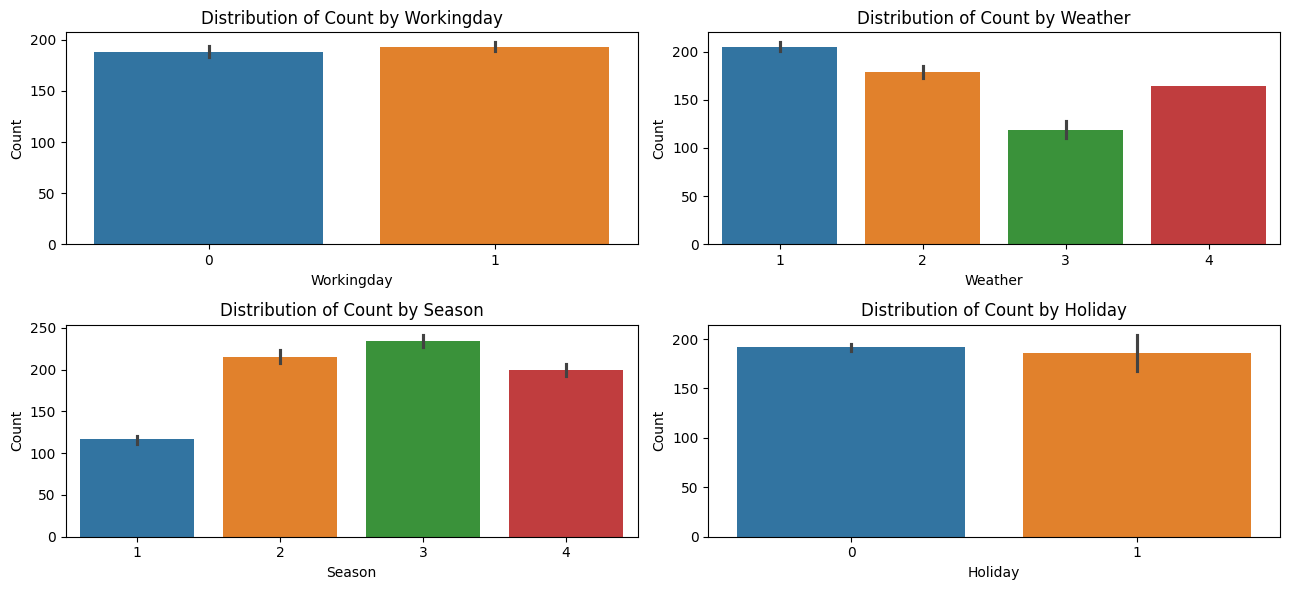

In [37]:
plt.figure(figsize=(13, 6))

# Define colors for each subplot
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

plt.subplot(2, 2, 1)
sns.barplot(x="workingday", y="count", hue="workingday", data=df, palette=colors[:2], legend=False)
plt.title("Distribution of Count by Workingday")
plt.xlabel("Workingday")
plt.ylabel("Count")

plt.subplot(2, 2, 2)
sns.barplot(x="weather", y="count", hue="weather", data=df, palette=colors[:4], legend=False)
plt.title("Distribution of Count by Weather")
plt.xlabel("Weather")
plt.ylabel("Count")

plt.subplot(2, 2, 3)
sns.barplot(x="season", y="count", hue="season", data=df, palette=colors[:4], legend=False)
plt.title("Distribution of Count by Season")
plt.xlabel("Season")
plt.ylabel("Count")

plt.subplot(2, 2, 4)
sns.barplot(x="holiday", y="count", hue="holiday", data=df, palette=colors[:2], legend=False)
plt.title("Distribution of Count by Holiday")
plt.xlabel("Holiday")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

<ipython-input-40-44dd4f191688>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


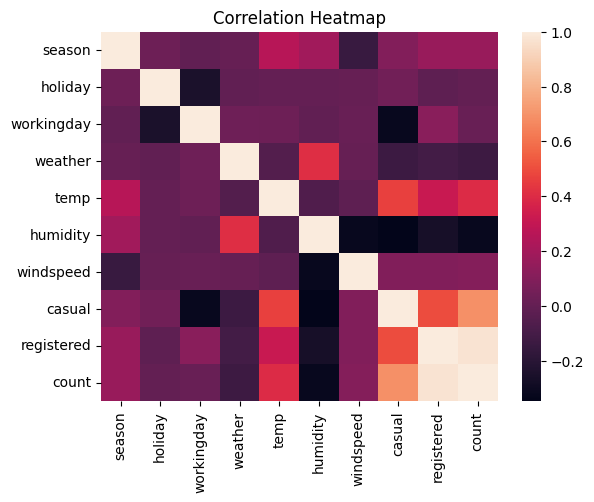

In [40]:
sns.heatmap(df.corr())
plt.title("Correlation Heatmap")

plt.show()

- Big count of rented bikes when weather is humid. So, Humidity is the factor which is affecting count of rented bikes.
- On the working day, demand of casual bikes is more.

## Checking if Working Day has an effect on the number of electric cycles rented.


- **H0 = No significant difference between no. of bike rides on weekdays and weekends.**
- **H1 = There is a significant different no. of bike rides on weekdays and weekends.**

* **Test = 2- Sample Independent T-test**

In [92]:
df_weekdays = df[df["workingday"] == 1]["count"]
df_weekends = df[df["workingday"] == 0]["count"]

alpha = 0.05

statistics, p_val = ttest_ind(df_weekdays, df_weekends, alternative = 'two-sided')
statistics, p_val

if p_val <= alpha:
  print("We have evidence to reject the null hypothesis. So, we can say that there is significant difference between the no. of bike rides on Weekdays and Weekends.")
else:
  print("We do not have evidence to reject the null hypothesis. So, we can say that there is no. of bike rides on Weekdays and Weekends is same.")

We do have evidence to reject the null hypothesis. So, we can say that there is significant difference between the no. of bike rides on Weekdays and Weekends.


From the above Hypothesis, we can conclude that demand of bikes is more on working day than non-working day. So, working day is a factor which affect count of rented bike.

## Checking if the demand of bicycles on rent is the same for different Weather conditions.

- **H0 = No significant difference between count of ranted bikes for different weather conditions.**
- **H1 = There is a significant difference between count of ranted bikes for different weather conditions.**
- **Test = One-way ANOVA test**


#### Checking Assumptions for Anova



<Axes: xlabel='weather', ylabel='Count'>

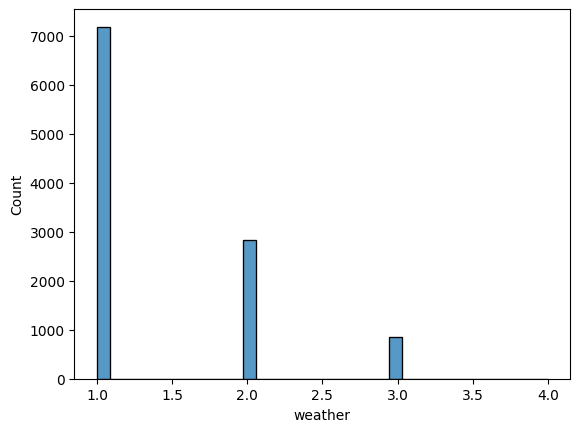

In [10]:
#Hist Plot
sns.histplot(df["weather"])

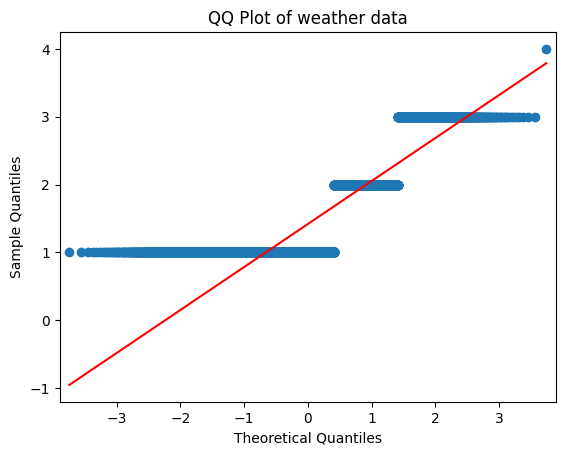

In [27]:
# QQPlot
qqplot(df["weather"], line='s')
plt.title('QQ Plot of weather data')
plt.show()

In [29]:
# Skewness of Weather
skew(df["weather"])

1.2433126730817885

In [15]:
#levene test on weather
kurtosis(df["weather"])

0.39480007841067577

In [62]:
alpha = 0.05

w1 = df[df["weather"]==1]["count"]
w2 = df[df["weather"]==2]["count"]
w3 = df[df["weather"]==3]["count"]
w4 = df[df["weather"]==4]["count"]
statistics, p_val = f_oneway(w1,w2,w3,w4)
if p_val <= alpha:
  print("We have evidence to reject the null hypothesis. So, we can say that demand of bicycles on rent is the not same for different Weather conditions.")
else:
  print("We do not have evidence to reject the null hypothesis. So, we can say that demand of bicycles for different Weather conditions is same.")

We have evidence to reject the null hypothesis. So, we can say that demand of bicycles on rent is the not same for different Weather conditions.


## Checking if the demand of bicycles on rent is the same for different Seasons.

- **H0 = Rented bicycles for different seasons is same.**
- **H1 = Rented bicycles for different seasons is not same.**

* **Test = One-way ANOVA test**

#### Checking Assumptions for Anova

<Axes: xlabel='season', ylabel='Count'>

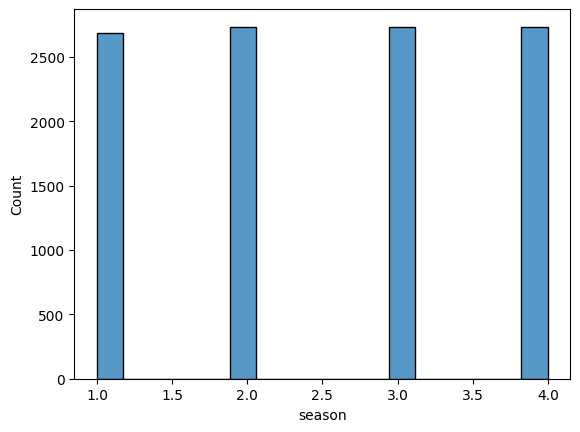

In [63]:
sns.histplot(df["season"])

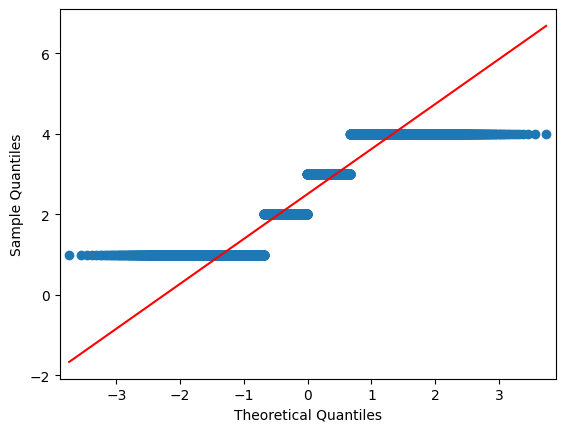

In [68]:
qqplot(df["season"], line = 's')
plt.show()

In [66]:
skew(df["season"])

-0.007074695296526289

In [67]:
kurtosis(df["season"])

-1.3555899543299803

In [76]:
# Test = One-way ANOVA test
alpha = 0.05

s1 = df[df["season"]==1]["count"]
s2 = df[df["season"]==2]["count"]
s3 = df[df["season"]==3]["count"]
s4 = df[df["season"]==4]["count"]
statistics, p_val = f_oneway(s1,s2,s3,s4)
if p_val <= alpha:
  print("We have evidence to reject the null hypothesis. So, we can say that demand of bicycles on rent is the not same for different seasons")
else:
  print("We do not have evidence to reject the null hypothesis. So, we can say that demand of bicycles for different Weather conditions is same.")

We have evidence to reject the null hypothesis. So, we can say that demand of bicycles on rent is the not same for different seasons


From the above conducted hypothesis we can conclude that the demand of rented bikes is different for different weather conditions. So, weather conditions also affect count of rented bikes.

# Checking if the Weather conditions are significantly different during different Seasons.

- **H0 - Weather conditions are same during different seasons.**
- **H1 - Weather conditions are different during different seasons.**
- **Test = Chisquare Test**



In [86]:
#Chisquare Test

observation = pd.crosstab(df["weather"], df["season"])
statistics, p_val, dof, expected_frequency = chi2_contingency(observation)

alpha = 0.05
if p_val <= alpha:
  print("There is significant evidence to reject null hypothesis. So, we can say that weather conditions are significantly different during different seasons.")
else:
  print("We do not have significant evidence to reject null hypothesis. So, we can say that weather conditions are same during different seasons.")


There is significant evidence to reject null hypothesis. So, we can say that weather conditions are significantly different during different seasons.


From the above conducted hypothesis we can conclude that there is significant evidence which show that weather conditions is not same for all the seasons.

## **Inferences -**

**Significant Variables for Predicting Demand:** The variables found to be significant in predicting the demand for shared electric cycles in the Indian market include season, weather conditions, temperature, humidity, and windspeed. These factors have a notable impact on the demand for bicycle rentals.

**Difference in Bike Rides on Weekdays vs. Weekends:** The analysis showed a statistically significant difference in the number of bike rides on weekdays compared to weekends. Specifically, the demand for shared electric cycles tends to be higher on weekends, indicating potential differences in commuting patterns and leisure activities.

**Impact of Weather Conditions on Bike Demand:** There is a significant difference in bike rental demand across different weather conditions. Clear weather and few clouds are associated with higher demand, while heavy rain and snow lead to a decrease in demand. Yulu should consider weather forecasts to optimize bike availability and marketing strategies.

**Effect of Seasons on Bike Demand:** Seasonal variations have a significant impact on bike rental demand, with certain seasons experiencing higher demand than others. For example, demand tends to peak during spring and fall, while it may decrease during extreme weather conditions in summer and winter. Yulu can adjust bike fleet distribution and promotions accordingly.

**Weather Conditions Variation Across Seasons:** There is evidence to suggest that weather conditions vary significantly across different seasons. For instance, mist and cloudy weather are more common during winter, while clear weather prevails in spring and fall. Understanding these variations can help Yulu anticipate demand fluctuations and optimize operational strategies.

## **Conclusions**:

- Yulu should focus on optimizing its services and marketing efforts based on seasonal and weather-related demand patterns.
- Tailoring bike availability and promotional activities according to weekdays/weekends can help maximize rental revenue.
- Investing in weather forecasting technology and partnerships can enhance operational efficiency and customer satisfaction.
- Continuous monitoring and analysis of user preferences and market trends are essential for adapting to changing demand dynamics.

## **Recommendations**:

- Develop targeted marketing campaigns based on weather forecasts and seasonal trends to encourage bike rentals during optimal conditions.
- Implement flexible pricing strategies to incentivize bike usage during off-peak hours and seasons.
- Enhance user experience by providing real-time weather updates and recommendations through the Yulu app.
- Collaborate with local authorities and businesses to promote bike-sharing as a sustainable transportation option, especially during peak demand periods.
- Invest in expanding the bike fleet and infrastructure in high-demand areas to meet growing user needs.
- Conduct regular customer surveys and feedback sessions to gather insights for further service improvements and innovations.